In [66]:
# Import Libraries

In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
# Importing Data

In [69]:
df = pd.read_csv('diabetes.csv')

In [70]:
# Reading the Data

In [71]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [73]:
# Cleaning the Data

<Axes: >

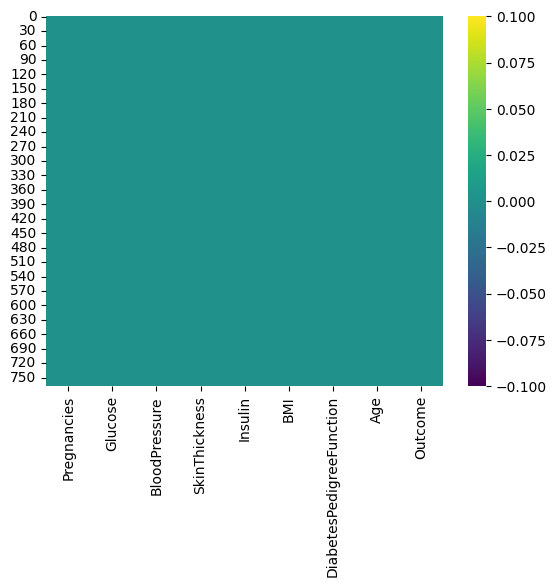

In [74]:
sns.heatmap(df.isnull(),cmap = 'viridis')

Although it seems like there is no null values, there can be alternate null values such as 0.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

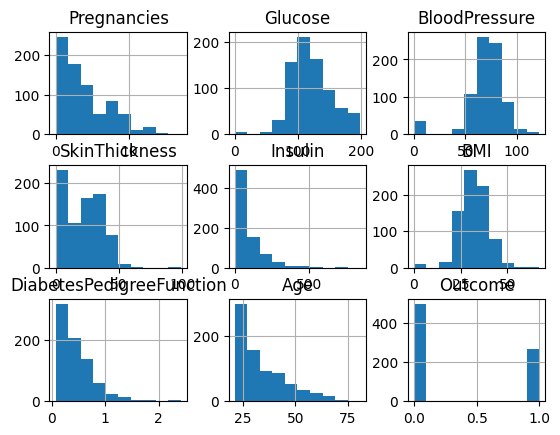

In [75]:
df.hist()

We cant have values as 0 for age, bmi and blood pressure. Its intuitive though.

In [76]:
df = df[(df['BMI'] != 0) & (df['BloodPressure'] != 0) & (df['Age'] != 0)]

In [77]:
df.shape

(729, 9)

In [78]:
# Feature Selection

In [79]:
x = df[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']]
y = df['Outcome']

In [80]:
# Data Preprocessing

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, stratify = y, random_state = 0)

In [82]:
# Model Training and Prediction

In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

In [84]:
lr.fit(x_train,y_train)

LogisticRegression(C=1, multi_class='ovr', solver='liblinear')

In [85]:
y_pred = lr.predict(x_test)

In [86]:
# Model Evaluation

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("K-Fold Cross Validation :", cross_val_score(lr, x, y, cv = 10, scoring='accuracy').mean())

Accuracy : 0.7814207650273224
K-Fold Cross Validation : 0.7792237442922374


In [88]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy : {}".format(accuracy))

Accuracy : 0.7814207650273224


In [89]:
import itertools

# Method to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[108  12]
 [ 28  35]]


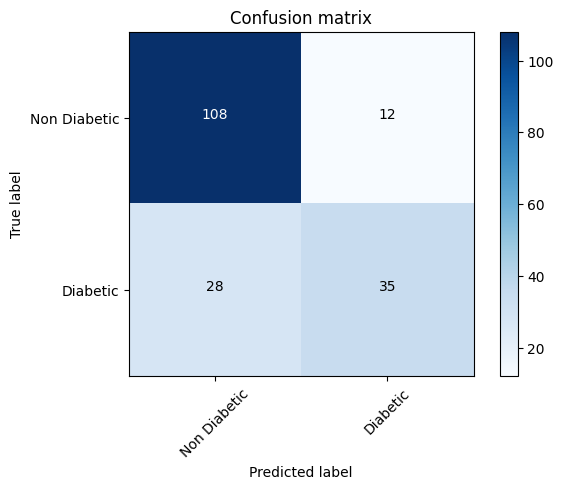

In [90]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Non Diabetic', 'Diabetic'], title='Confusion matrix')

In [91]:
cf = confusion_matrix(y_test, y_pred)

In [92]:
TP = cf[0][0]
FP = cf[0][1]
FN = cf[1][0]
TN = cf[1][1]
print(cf)

[[108  12]
 [ 28  35]]


In [93]:
print(FP)

12


In [94]:
# Accuracy

Acc = (TP + TN) / (TP + FP + FN + TN)
print(Acc)
print(accuracy_score(y_test,y_pred))

0.7814207650273224
0.7814207650273224


In [95]:
# Precision

Pre = TP / (TP + FP)
print(Pre)
print(precision_score(y_test,y_pred))

0.9
0.7446808510638298


In [96]:
# Recall

Rec = TP / (TP + FN)
print(Rec)
print(recall_score(y_test, y_pred))

0.7941176470588235
0.5555555555555556


In [97]:
# FPR

print(FP / (FP + TN))

0.2553191489361702


### ROC Curves and Area Under the Curve (AUC)

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score

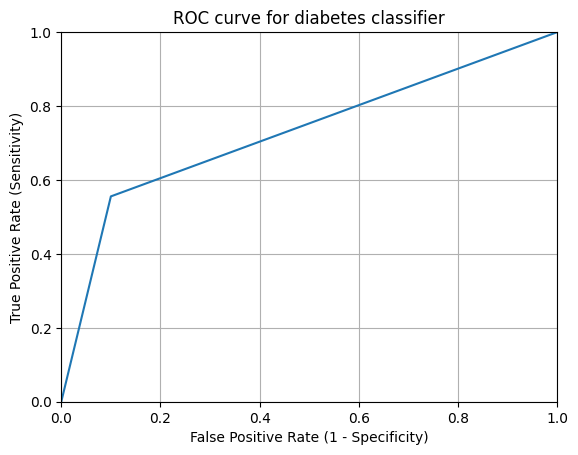

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [100]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [101]:
evaluate_threshold(0.3)

Sensitivity: 0.5555555555555556
Specificity: 0.9


In [102]:
evaluate_threshold(0.5)

Sensitivity: 0.5555555555555556
Specificity: 0.9


In [104]:
print(roc_auc_score(y_test, y_pred))

0.7277777777777779


In [105]:
# calculate cross-validated AUC
cross_val_score(lr, x, y, cv=10, scoring='roc_auc').mean()

0.8309997272231315